chatbots with langgraph

In [1]:
!pip install -U langgraph

In [2]:
!pip install -U langsmith

In [3]:
!pip install langchain langchain_groq langchain_community

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [5]:
llm = ChatGoogleGenerativeAI(
        model="gemini-1.5-pro",
        temperature=0.5,  # Adjusted temperature for variety
        max_tokens=150,   # Set max tokens to avoid None issues
        timeout=None,
        max_retries=2,
    )

In [6]:
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"
LANGCHAIN_API_KEY="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"
LANGCHAIN_PROJECT="langgrpah"
LANGCHAIN_TRACING_V2="true"

In [7]:
from typing import  Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END #statemangement
from langgraph.graph.message import add_messages 

In [8]:
class state(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder = StateGraph(state)

In [9]:
graph_builder

In [10]:
def chatbot(state:state):
    
    return{"messages":llm.invoke(state['messages'])}

In [11]:
graph_builder.add_node("chatbot",chatbot)

In [12]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)
graph = graph_builder.compile()

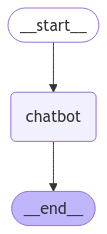

In [13]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [1]:
if __name__ == "__main__":
    print("Chatbot is running. Type 'quit' or 'q' to exit.")
    
    state = {"messages": []}  # Initial state
    
    while True:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "q"]:
            print("Goodbye!")
            break
        
        # Add the user input to the messages
        state["messages"].append(("user", user_input))
        
        # Process the input through the graph
        for event in graph.stream(state):
            if event.values():
                for value in event.values():
                    print("Assistant:", value["messages"].content)
                    # Update state with assistant messages
                    state["messages"].append(("assistant", value["messages"].content))

Chatbot is running. Type 'quit' or 'q' to exit.


NameError: name 'graph' is not defined

In [4]:
from typing import  Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END #statemangement
from langgraph.graph.message import add_messages 
from langchain_google_genai import ChatGoogleGenerativeAI
# Define the state type
class State(TypedDict):
    messages: Annotated[list, "add_messages"]

# Initialize the LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0.5,
    max_tokens=150,
    timeout=None,
    max_retries=2,
)

# Define the chatbot function
def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": response}

# Create and compile the graph
graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

# Main loop
if __name__ == "__main__":
    print("Chatbot is running. Type 'quit' or 'q' to exit.")
    
    state = {"messages": []}  # Initial state
    
    while True:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "q"]:
            print("Goodbye!")
            break
        
        # Add the user input to the messages
        state["messages"].append(("user", user_input))
        
        # Process the input through the graph
        try:
            for event in graph.stream(state):
                if event.values():
                    for value in event.values():
                        print("Assistant:", value["messages"].content)
                        # Update state with assistant messages
                        state["messages"].append(("assistant", value["messages"].content))
        except Exception as e:
            print(f"Error during processing: {e}")


Chatbot is running. Type 'quit' or 'q' to exit.
Assistant: London



KeyboardInterrupt: Interrupted by user

In [5]:
result = llm.invoke(" colour of sun")

In [6]:
print(result)

content="The Sun, from Earth, appears yellow.  However, its true color is **white**.\n\nHere's why:\n\n* **White light is made up of all colors.**  The Sun emits light across the visible spectrum, and if you were to view it from space, it would appear white.\n* **Earth's atmosphere scatters blue light.** This scattering effect, known as Rayleigh scattering, is why the sky appears blue.  With the blue light scattered away, the remaining light that reaches our eyes appears yellowish.\n* **At sunrise and sunset, the Sun appears more red or orange.** This is because the light has to travel through more of the atmosphere at these times, further scattering the shorter wavelengths (like blue and" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'MAX_TOKENS', 'safety_ratings': []} id='run-35b35cf9-5acd-457d-a193-97d06a9b9c6c-0' usage_metadata={'input_tokens': 4, 'output_tokens': 150, 'total_tokens': 154, 'input_token_details

In [9]:
!pip install wikipedia arxiv

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11705 sha256=b83c842648dfcbaba2fbb449799bdbb346d831611609b3fc4c8a9e0ab62ffbd0
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\8f\ab\cb\45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-

In [13]:
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun

# Initialize API wrappers
arxiv_wrapper = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=300)
wiki_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=300)

# Pass the API wrappers during tool initialization
arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_wrapper)
wiki_tool = WikipediaQueryRun(api_wrapper=wiki_wrapper)


In [14]:
wiki_tool.invoke("who is dhoni")

'Page: MS Dhoni\nSummary: Mahendra Singh Dhoni ( ; born 7 July 1981) is an Indian professional cricketer who plays as a right-handed batter and a wicket-keeper. Widely regarded as one of the most prolific wicket-keeper batsmen and captains, he represented the Indian cricket team and was the captain of'